In [3]:
import pandas as pd

In [4]:
source_message = "C'era una volta una bambina che indossava sempre una mantellina con il cappuccio di colore rosso che le aveva fatto la sua nonna, così tutti i vicini la chiamavano Cappuccetto Rosso. Un giorno la mamma le disse di portare un cestino con una focaccia e una bottiglia di vino alla nonna che abitava al di là del bosco e le raccomando più volte di stare attenta lungo la strada e di comportarsi bene dalla nonna. Cappuccetto Rosso uscì di casa con il cestino in mano e si inoltrò nel bosco. Dopo una mezzoretta di cammino, Cappuccetto Rosso incontrò un lupo, ma non sapeva che fosse una bestia tanto cattiva e non ebbe paura. Il lupo le chiese dove stava andando, la piccola rispose che andava dalla nonna e gli spiegò dove abitava. Su invito del lupo, la bimba si soffermò poi a accogliere dei fiorellini, mentre il lupo andò di corsa a casa della nonna. Facendo la vocina come se fosse la nipotina, si fece dire come aprire, entrò e in un sol boccone la mangiò. Poi indossò la sua camicia da notte, la cuffietta  e si infilò sotto le coperte ad aspettare Cappuccetto Rosso. Quando questa arrivò, guardò con meraviglia la sua nonnina, che le sembrava avere le mani grandi, le orecchie grandi e anche la bocca, e fu con la bocca che il lupo facendo un balzo la inghiottì. Fatto il suo buon pasto il lupo doveva tornare nel bosco, ma era talmente pieno che decise di fermarsi a fare un pisolino. Nel frattempo proprio vicino alla casetta passava un cacciatore che fu attirato dal forte russare del lupo e decise di entrare. Appena lo vide dormire sul letto, con il pancione e la bocca aperta, s'immaginò tutto. Subito prese delle forbici e iniziò a tagliare la pancia del lupo, prima uscì Cappuccetto Rosso e dopo la nonna. Cappuccetto decise di farla pagare al lupo, così prese delle grosse pietre che il cacciatore infilò dentro la pancia del lupo e la ricucì. Quando egli si svegliò fece per correr via, ma le pietre erano cosi pesanti che subito s'accasciò e cadde morto. Erano contenti tutti e tre: il cacciatore scuoiò il lupo e si portò via la pelle; la nonna mangiò la focaccia e bevve il vino che aveva portato Cappuccetto Rosso, e si rianimò; ma Cappuccetto Rosso pensava che non avrebbe più disobbedito alla mamma."
source_message = source_message.lower()

In [5]:
def get_source_alphabet(source):
    # input: source message 
    # output, symbols and probabilities
    alphabet = [] #for now, a list (dynamic) is the best way (i believe)
    occurances = []
    for i, character in enumerate(source):
        if character in alphabet: 
            ix = alphabet.index(character)
            occurances[ix] += 1
        else:
            alphabet.append(character)
            occurances.append(0)
    num_symb = len(source)
    out = [(sym, count/num_symb) for sym, count in zip(alphabet, occurances)]
    return pd.DataFrame(out)

In [6]:
alphabet = get_source_alphabet(source_message).rename(columns={0: "symb", 1: "prob"})

<AxesSubplot:xlabel='symb'>

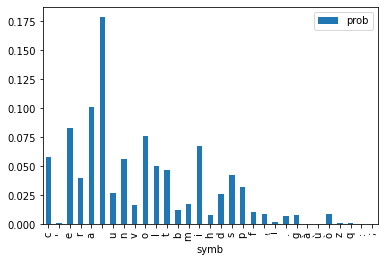

In [7]:
alphabet.plot.bar(x='symb')

We have the dictionary with the probabilities calculated in a frequentist fashion.
# Huffman code

In [8]:
import copy

h_alphabet = copy.copy(alphabet)
# 1) order alphabet by probabilities
h_alphabet = h_alphabet.sort_values(by="prob", ascending=False)

In [9]:
alphabet

,symb,prob
0,c,0.057632
1,',0.000900
2,e,0.083296
3,r,0.039622
4,a,0.100855
5,,0.178748
6,u,0.026565
7,n,0.056281
8,v,0.016209
9,o,0.076092


In [10]:
h_symb_list = h_alphabet['symb'].to_list()
h_probs_list = h_alphabet['prob'].to_list()

In [12]:
# h1) create one node (leaf) for each symbol
# h2) get the two nodes with least probability, create a parent for them, with new prob. 
from tree import *

r_tree = Tree(h_symb_list, h_probs_list)

r_tree.createParentFromSiblings(['a','b'])
r_tree.print_all_nodes()



a
b
  -> p: 0.17874831157136425
e -> p: 0.08329581269698334
o -> p: 0.07609185051778478
i -> p: 0.06708689779378658
c -> p: 0.05763169743358847
n -> p: 0.05628095452498874
l -> p: 0.04997748761819001
t -> p: 0.04682575416479064
s -> p: 0.042323277802791534
r -> p: 0.03962179198559208
p -> p: 0.031967582170193604
u -> p: 0.02656461053579469
d -> p: 0.025664115263394866
m -> p: 0.017559657811796487
v -> p: 0.01620891490319676
f -> p: 0.010805943268797838
ò -> p: 0.008554705087798289
, -> p: 0.008554705087798289
g -> p: 0.00810445745159838
h -> p: 0.00765420981539847
. -> p: 0.00675371454299865
ì -> p: 0.0022512381809995496
z -> p: 0.0013507429085997298
' -> p: 0.0009004952723998199
q -> p: 0.0009004952723998199
ù -> p: 0.00045024763619990995
; -> p: 0.00045024763619990995
à -> p: 0.0
: -> p: 0.0
|a|b| -> p: 0.11346240432237731
